# DB에서 매트릭을 읽어서 그래프 그리기

<p>won@aimmo.co.kr(swhors@naver.com)</p>

In [2]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


In [8]:
def restart_kernel():
    # Restart the kernet after libraries are loaded.
    import IPython
    from datetime import datetime
    print(f'restart kernel... {datetime.now()}')
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

restart_kernel()

restart kernel... 2025-05-29 12:11:53.308318


In [3]:
import os
import sys
from datetime import datetime
cwd = os.getcwd()
sys.path.append(cwd)
print(sys.path)

print(f'load_library step#1 {datetime.now()}')

from datetime import datetime
from lib.metrics_loader import load_data_by_version
from lib.graph_util import draw_data_graph
from lib.graph_util import draw_data_graph_v2
from lib.graph_util import load_image
from lib.graph_util import draw_graph_with_metric
from lib.graph_util import load_all_image
from lib.metric_analyze import load_data, draw_metric
from lib.metric_analyze import draw_graph
print(f'load_library step#2 {datetime.now()}')

['/home/swhors/jupyter-workspace/LSTM/$PWD', '/home/swhors/jupyter-workspace/finance', '/home/swhors/jupyter-workspace/finance/venv/lib/python3.11/site-paches', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/home/swhors/jupyter-workspace/finance/venv/lib/python3.11/site-packages', '/home/swhors/jupyter-workspace/LSTM', '/home/swhors/jupyter-workspace/LSTM']
load_library step#1 2025-05-30 11:26:33.586999
load_library step#2 2025-05-30 11:26:33.587256


In [5]:
active_version = 0
with open('active.version', 'r') as fd:
    line = fd.read()
    active_version = int(line)
print(f'active_version={active_version}')
print(f'open active version {datetime.now()}')

active_version=36
open active version 2025-05-29 11:35:08.208537


In [4]:
!echo $PYTHONPATH

$PWD:/home/swhors/jupyter-workspace/finance:/home/swhors/jupyter-workspace/finance/venv/lib/python3.11/site-paches


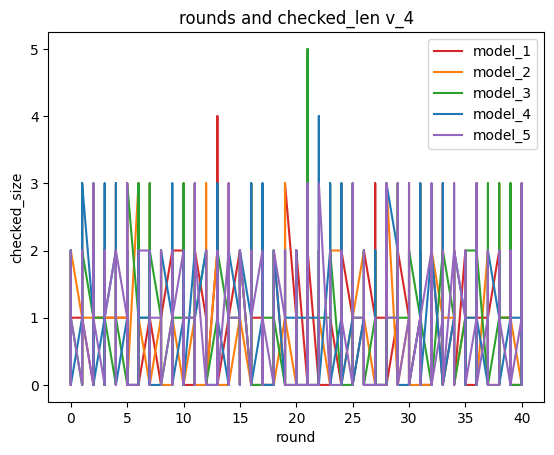

In [5]:
# active_version을 그래프로 그림
only_active=True
if only_active:
    draw_graph_with_metric(version=active_version, is_save=True)

In [25]:
# 이전 데이터 포함 모든 데이터를 버젼별로 그래프로 그림
draw_all=False
print(f'draw all metrics {datetime.now()}')
if draw_all:
    for ver in range(1, active_version + 1):
        draw_graph_with_metric(version=ver, is_save=True)

draw all metrics 2025-05-23 17:19:04.317061


In [9]:
# load only active_image
this_load_active=True
if this_load_active:
    draw_data_graph(title="model_id and checked", x_data=model_ids, y_data=checked_size, x_label="model_id", y_label="checked_size")

load_all_image 2025-05-27 16:03:57.361082
0 : v_0004.png


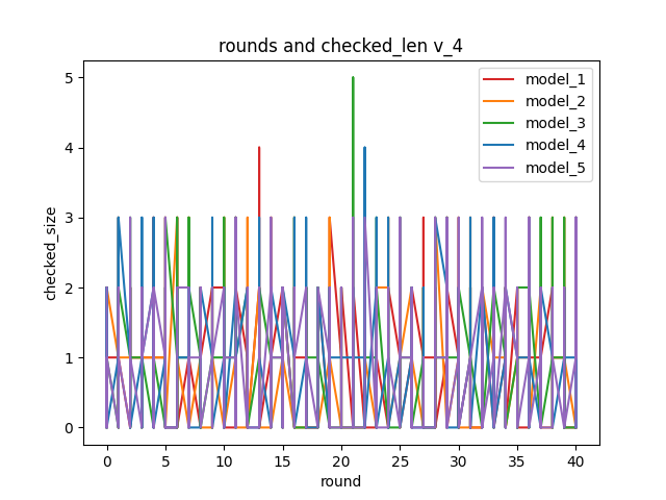

In [5]:
# load_all_image
draw_this_all=True
if draw_this_all:
    print(f'load_all_image {datetime.now()}')
    base_height = 500
    base_path = cwd
    load_all_image(base_path=base_path, base_height=base_height, verbose=False)

In [54]:
ts = datetime.now().timestamp()

In [55]:
print(ts)
ts = ts / 1000000000
print(ts)

1747919482.449404
1.747919482449404


read_db.0_1 (model_id=1)
read_db.0_2 (model_id=2)
read_db.0_3 (model_id=3)
read_db.0_4 (model_id=4)
read_db.0_5 (model_id=5)
read_db.0_6 (model_id=6)
read_db.10 complete (model_id=6)


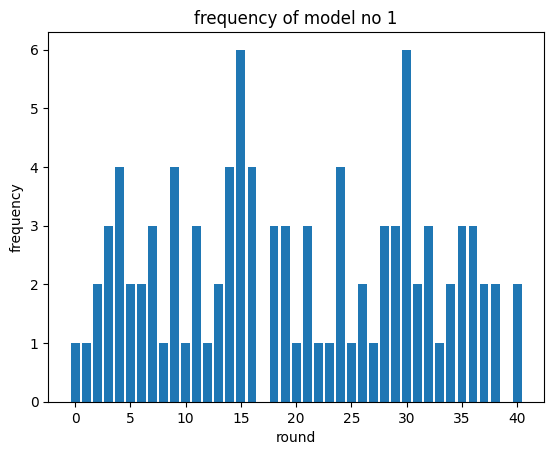

CPU 시간: 19.973401 초
메모리 사용량: 211072 KB


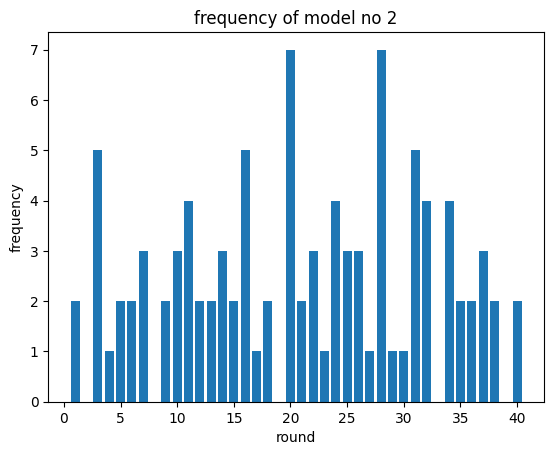

CPU 시간: 20.133926 초
메모리 사용량: 211072 KB


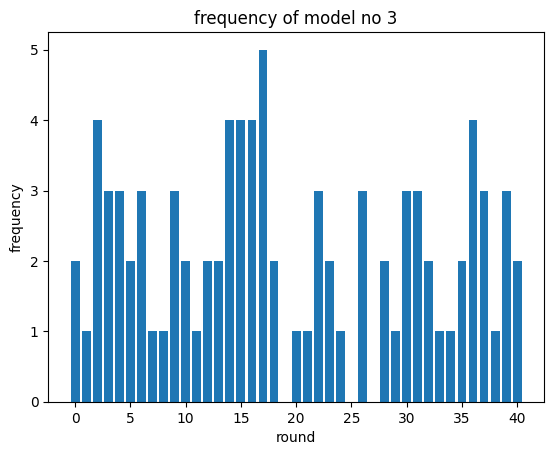

CPU 시간: 20.303525 초
메모리 사용량: 211072 KB


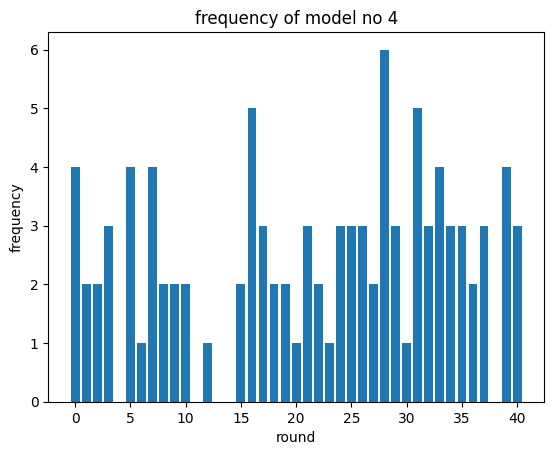

CPU 시간: 20.456621 초
메모리 사용량: 211072 KB


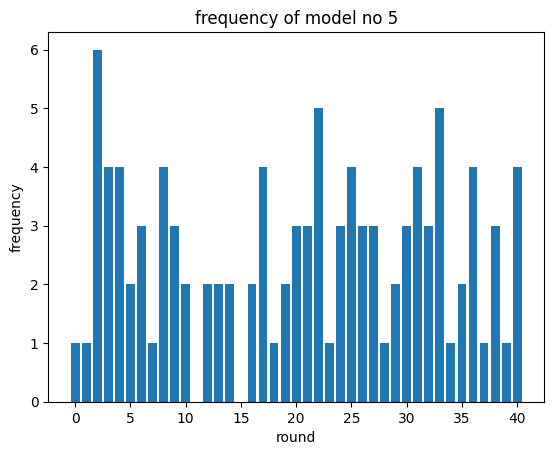

CPU 시간: 20.617755 초
메모리 사용량: 211072 KB


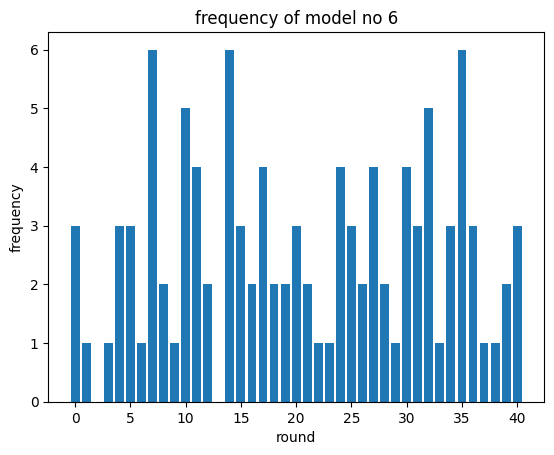

CPU 시간: 20.776278 초
메모리 사용량: 211072 KB


In [68]:
model_ids = [1, 2, 3, 4, 5, 6]
test_id = 'P4_4_1'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=1)
read_db.0_2 (model_id=2)
read_db.0_3 (model_id=3)
read_db.0_4 (model_id=4)
read_db.0_5 (model_id=5)
read_db.0_6 (model_id=6)
read_db.10 complete (model_id=6)


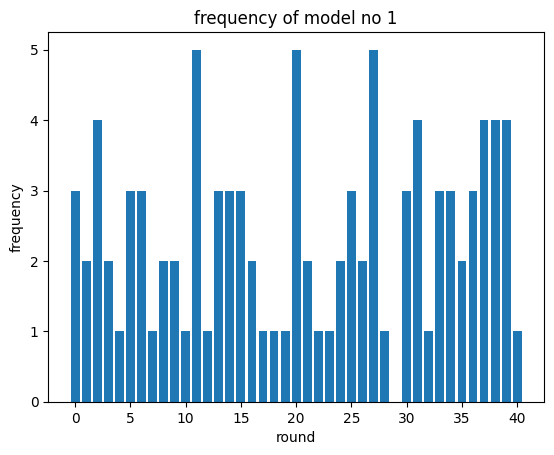

CPU 시간: 15.248176 초
메모리 사용량: 211424 KB


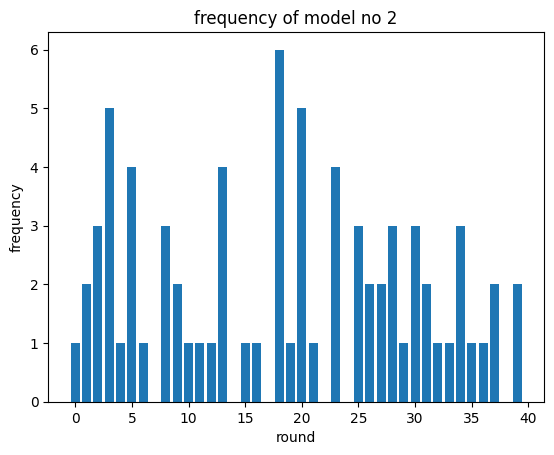

CPU 시간: 15.377726 초
메모리 사용량: 211424 KB


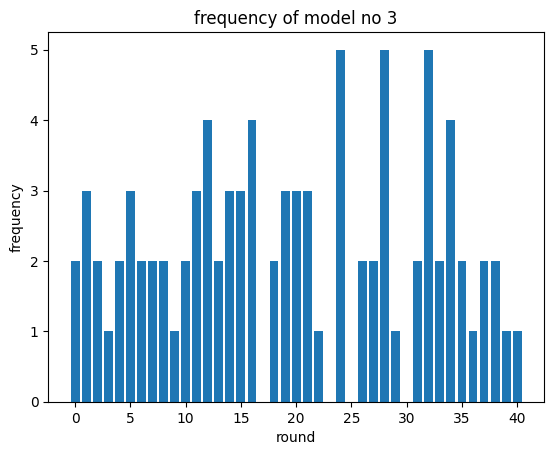

CPU 시간: 15.503859 초
메모리 사용량: 211424 KB


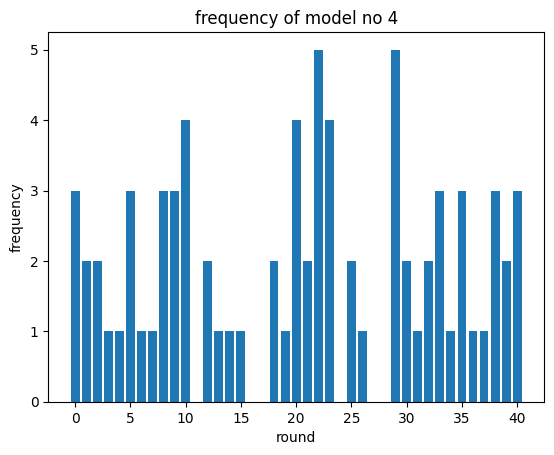

CPU 시간: 15.631059 초
메모리 사용량: 211424 KB


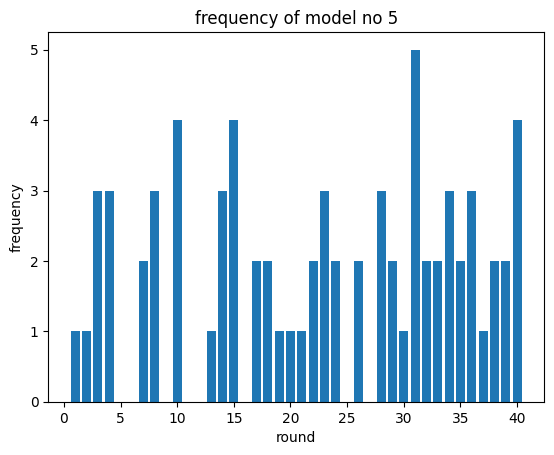

CPU 시간: 15.881696999999999 초
메모리 사용량: 211424 KB


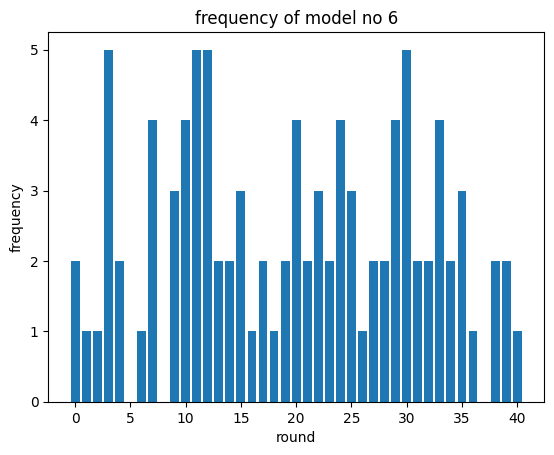

CPU 시간: 16.010155 초
메모리 사용량: 211424 KB


In [17]:
model_ids = [1, 2, 3, 4, 5, 6]
test_id = 'P4_4_1_1_1'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=1)
read_db.0_2 (model_id=2)
read_db.0_3 (model_id=3)
read_db.10 complete (model_id=3)


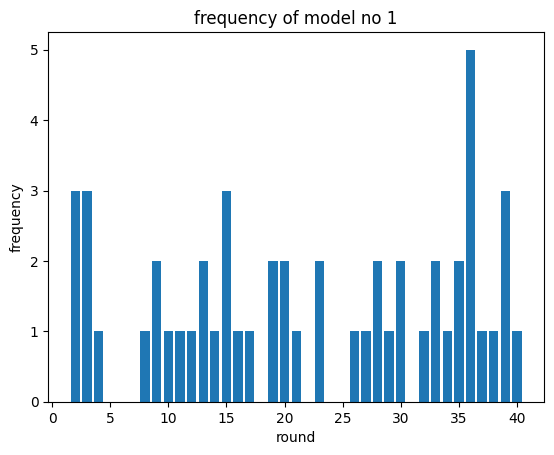

CPU 시간: 22.943346 초
메모리 사용량: 211072 KB


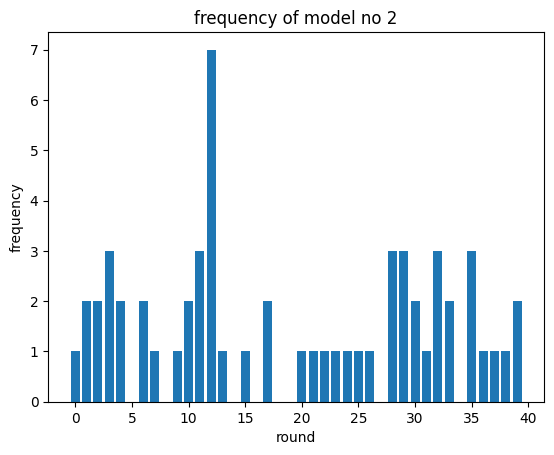

CPU 시간: 23.106412 초
메모리 사용량: 211072 KB


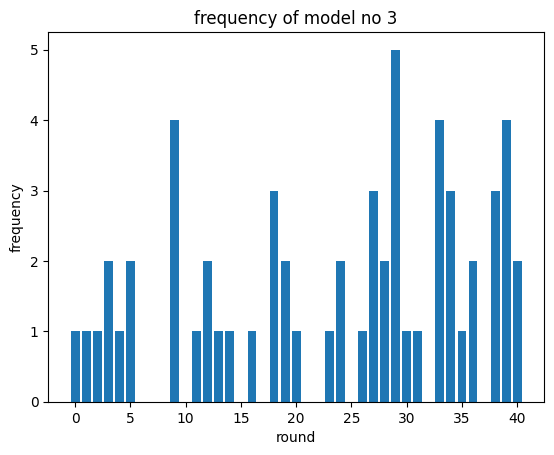

CPU 시간: 23.254967 초
메모리 사용량: 211072 KB


In [71]:
model_ids = [1, 2, 3]
test_id = 'P4_4_2'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=4)
read_db.0_2 (model_id=14)
read_db.10 complete (model_id=14)


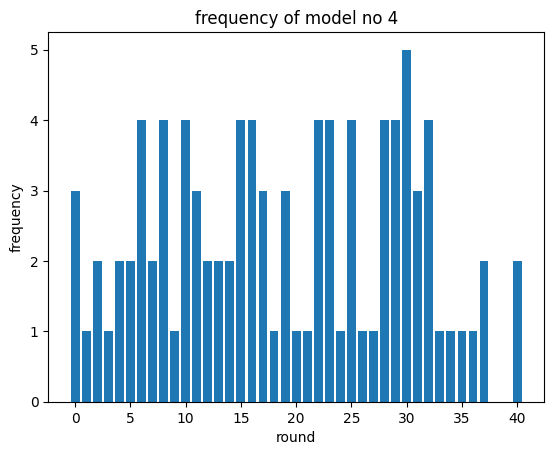

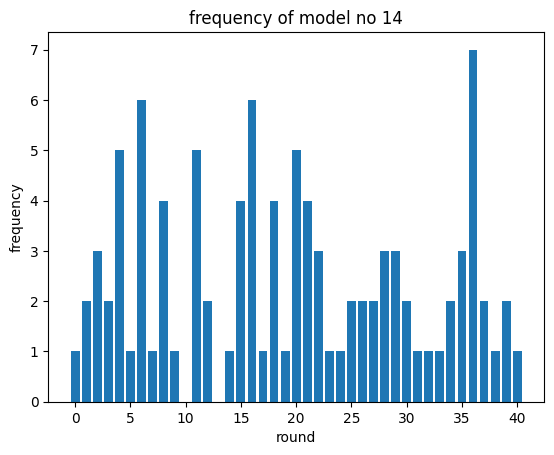

CPU 시간: 3.503774 초
메모리 사용량: 228480 KB


In [7]:
model_ids = [4, 14]
test_id = 'P4_4_5_1_1'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=14)
read_db.0_2 (model_id=24)
read_db.10 complete (model_id=24)


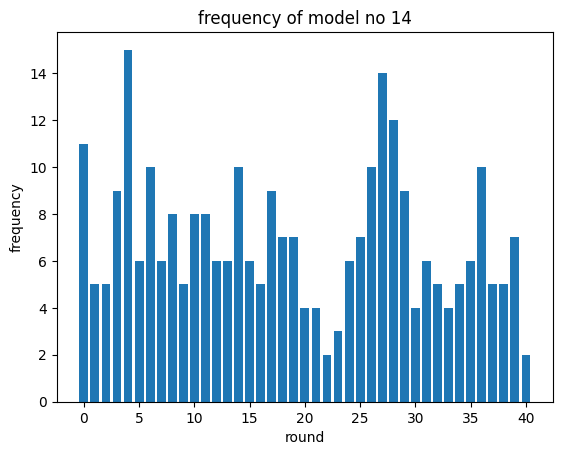

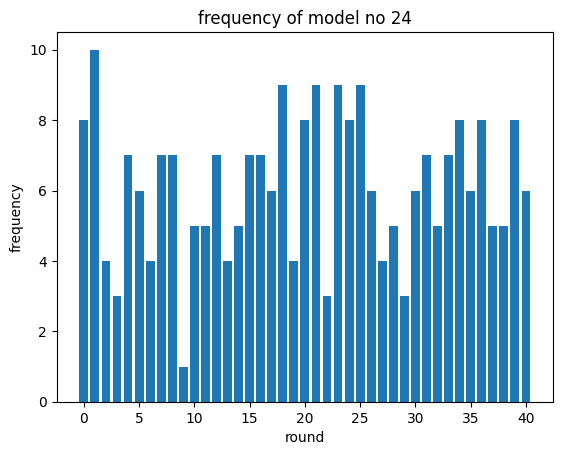

CPU 시간: 3.048339 초
메모리 사용량: 228480 KB


In [6]:
model_ids = [14, 24]
test_id = 'P4_4_5_1_2'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=14)
read_db.0_2 (model_id=34)
read_db.10 complete (model_id=34)


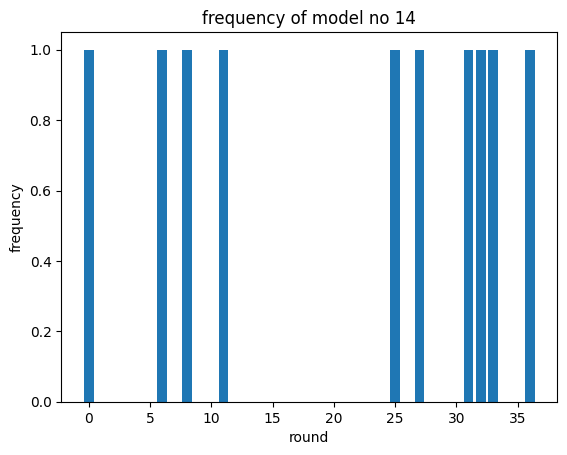

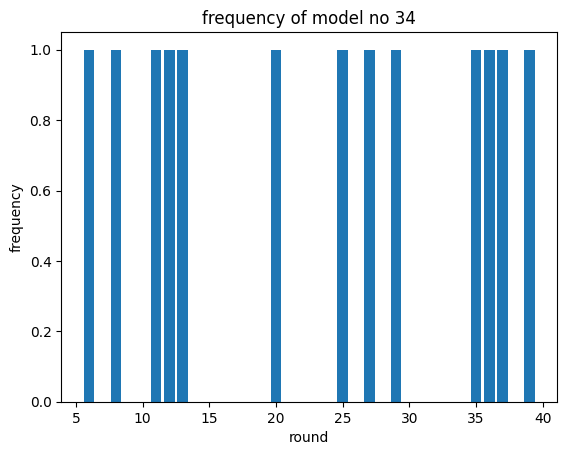

CPU 시간: 5.492864 초
메모리 사용량: 228480 KB


In [14]:
model_ids = [14, 34]
test_id = 'P4_4_5_1_3'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=1)
read_db.0_2 (model_id=2)
read_db.10 complete (model_id=2)


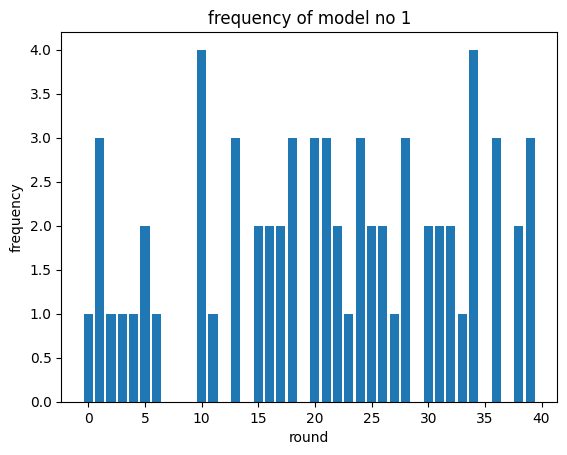

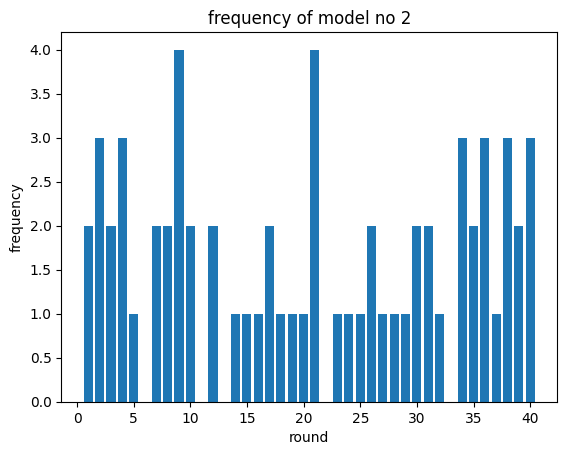

In [13]:
model_ids = [1, 2]
test_id = 'P4_4_3'
metrics_col = load_data(test_id=test_id, model_ids=model_ids)
draw_metric(metrics_col=metrics_col)

read_db.0_1 (model_id=2)
read_db.0_2 (model_id=6)
read_db.10 complete (model_id=6)


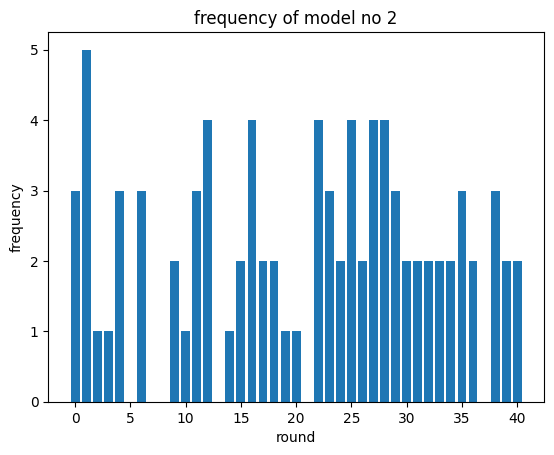

CPU 시간: 8.331053 초
메모리 사용량: 211072 KB


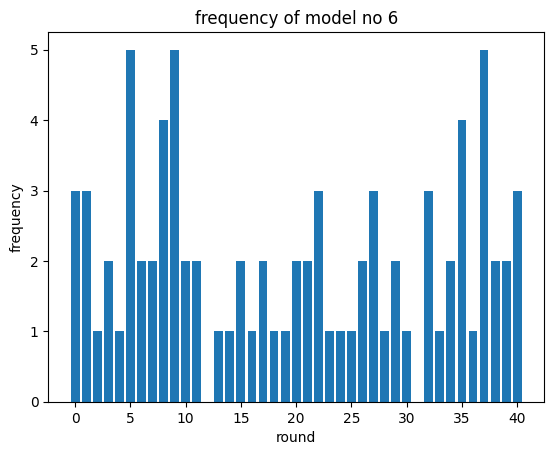

CPU 시간: 8.478126 초
메모리 사용량: 211072 KB


In [25]:
model_ids = [2, 6]
test_id = 'P4_4_4'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=6)
read_db.10 complete (model_id=6)


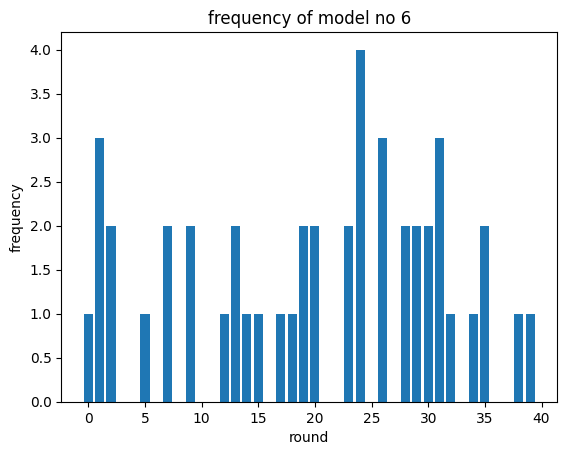

CPU 시간: 9.76052 초
메모리 사용량: 211072 KB


In [28]:
model_ids = [6]
test_id = 'P4_4_4_1'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=6)
read_db.10 complete (model_id=6)


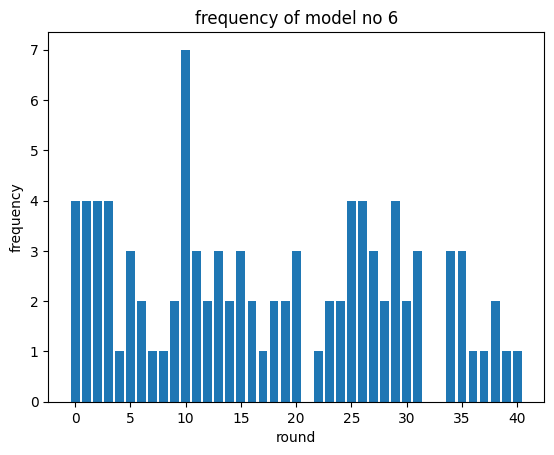

CPU 시간: 12.719101 초
메모리 사용량: 211072 KB


In [47]:
model_ids = [6]
test_id = 'P4_4_4_2'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=6)
read_db.10 complete (model_id=6)


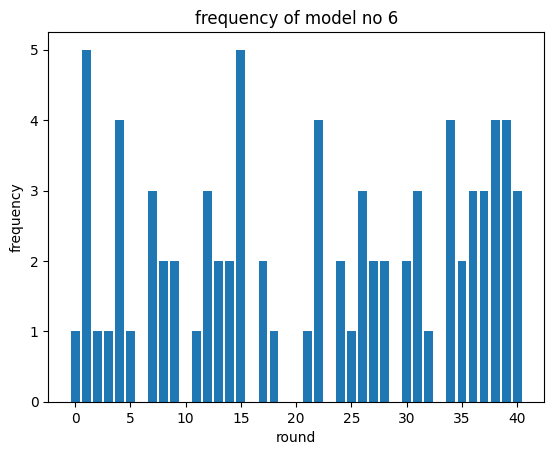

CPU 시간: 13.823868 초
메모리 사용량: 211072 KB


In [53]:
model_ids = [6]
test_id = 'P4_4_4_2_1'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

```
sqlite> select * from metrics where test_id="P4_4_4_2" and matched_size>2 and round=1;
83511|P4_4_4_2|6|1|6|1|2025-05-28 10:25:15.961866|2,5,13,16,18,35|5,18,35|3
84948|P4_4_4_2|13|1|6|3|2025-05-28 10:29:32.680010|30,1,35,11,3,36|1,30,35|3
85152|P4_4_4_2|14|1|6|2|2025-05-28 10:30:08.741464|9,18,19,20,30,32|18,20,30|3
85769|P4_4_4_2|17|1|6|4|2025-05-28 10:32:00.379100|20,1,24,5,44,6|1,5,20|3
sqlite> select * from metrics where test_id="P4_4_4_2_1" and matched_size>2 and round=1;
86794|P4_4_4_2_1|2|1|6|4|2025-05-28 10:35:28.561084|1,3,5,13,19,35|1,5,35|3
89049|P4_4_4_2_1|13|1|6|4|2025-05-28 10:42:11.742898|3,5,7,18,20,23|5,18,20|3
89255|P4_4_4_2_1|14|1|6|5|2025-05-28 10:42:49.288756|1,2,5,29,35,45|1,5,35|3
89869|P4_4_4_2_1|17|1|6|4|2025-05-28 10:44:43.318024|10,27,18,5,16,35|5,18,35|3
90483|P4_4_4_2_1|20|1|6|3|2025-05-28 10:46:31.876497|1,15,5,22,3,18|1,5,18|3
sqlite> select * from metrics where test_id="P4_4_4_2_1" and matched_size>2 and round=0;
90069|P4_4_4_2_1|18|0|6|4|2025-05-28 10:45:18.923240|1,23,30,35,41,42|1,30,35|3
sqlite> select * from metrics where test_id="P4_4_4_2" and matched_size>2 and round=0;
83100|P4_4_4_2|4|0|6|5|2025-05-28 10:24:01.240224|5,10,14,18,20,24|5,18,20|3
84327|P4_4_4_2|10|0|6|2|2025-05-28 10:27:42.757775|35,26,16,28,18,30|18,30,35|3
84738|P4_4_4_2|12|0|6|3|2025-05-28 10:28:55.820896|1,2,16,18,35,37|1,18,35|3
85762|P4_4_4_2|17|0|6|2|2025-05-28 10:31:59.737423|35,18,7,30,29,43|18,30,35|3
```

```
lstm_args = {6: {"model":{"learning_rate": learning_rate[0],
                          "dropout": dropout[0],
                          "steps": steps[0], # last output elements count
                          "metrics": metrics[0],
                          "last_lstm_return_sequences": last_lstm_return_sequences[1],
                          "lstm_units": lstm_units[5],
                          "dense_units": dense_units[4],
                          "output_dense_activation": output_dense_activation[3],
                          "loss": loss[1],
                          "return_state": False,
                          "lstm_model": "Bidirectional",
                          "rand_seed": rand_seed[0] # rand_seed[0]
                          },
                 "train": {"epochs": epochs[3],
                           "is_shuffle": False,
                           "batch": 3,
                           "steps_per_epoch": 90 #100
                           },
                 "dataset": datasets[0]
                 }
             }
```

read_db.0_1 (model_id=6)
read_db.10 complete (model_id=6)


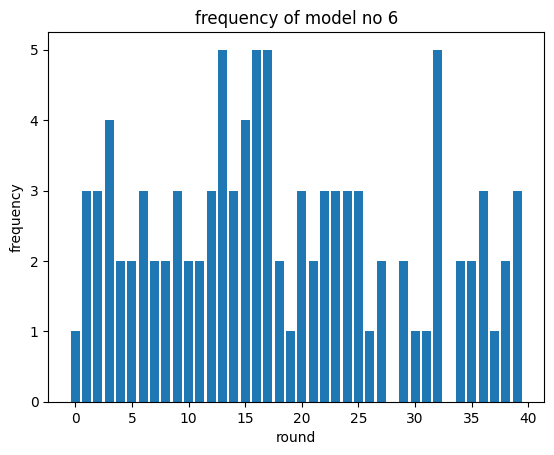

CPU 시간: 14.331356 초
메모리 사용량: 211072 KB


In [57]:
model_ids = [6]
test_id = 'P4_4_4_2_2'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=6)
read_db.10 complete (model_id=6)


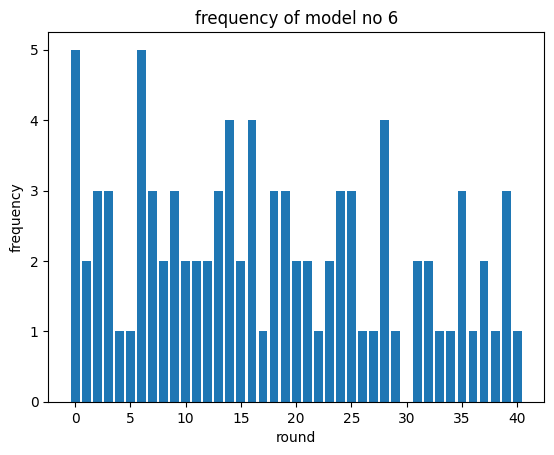

CPU 시간: 15.276341 초
메모리 사용량: 211072 KB


In [62]:
model_ids = [6]
test_id = 'P4_4_4_2_3'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=4)
read_db.0_2 (model_id=14)
read_db.10 complete (model_id=14)


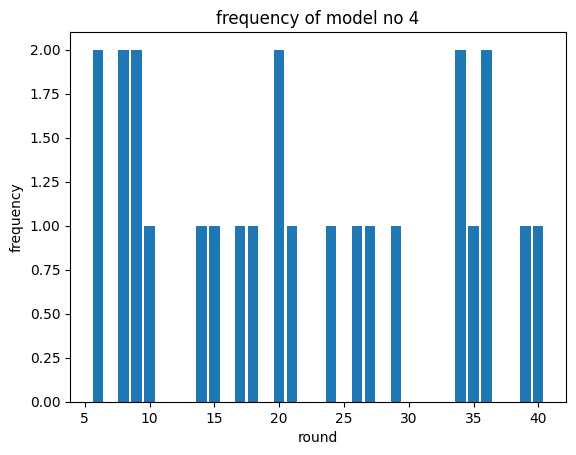

CPU 시간: 17.637714 초
메모리 사용량: 211424 KB


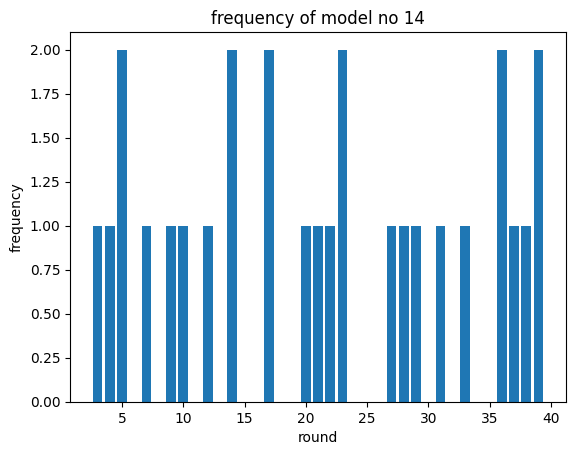

CPU 시간: 17.781562 초
메모리 사용량: 211424 KB


In [23]:
model_ids = [4, 14]
test_id = 'P4_4_5_1_1'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

read_db.0_1 (model_id=4)
read_db.0_2 (model_id=14)
read_db.10 complete (model_id=14)


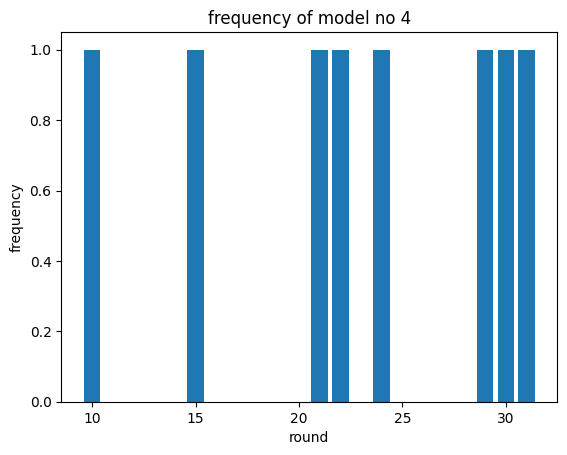

CPU 시간: 17.92259 초
메모리 사용량: 211424 KB


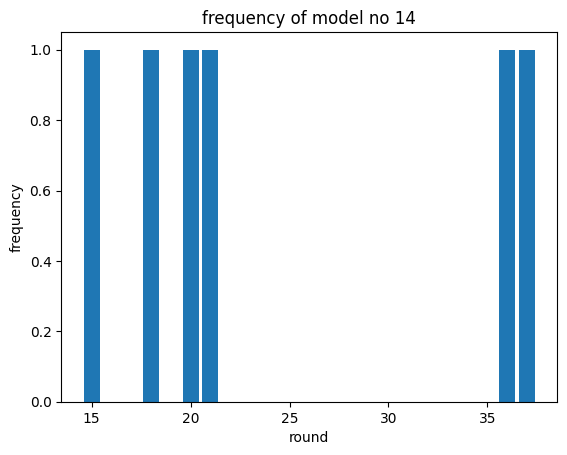

CPU 시간: 18.026162 초
메모리 사용량: 211424 KB


In [24]:
model_ids = [4, 14]
test_id = 'P4_4_5_1_1'
draw_graph(test_id=test_id, model_ids=model_ids, del_res=True)

In [50]:
op_this=False
if op_this:
    for metrics in metrics_col:
        id = metrics['id']
        keys = list(metrics['metric'].keys())
        values = list(metrics['metric'].values())